In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Lion
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#패키지 import

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#폰트 설치
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')

In [ ]:
df = df.set_index('관측일시')#인덱스로 설정

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, 2013-01-05 to 2024-12-28
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가뭄(MSWSI)   626 non-null    float64
 1   가뭄(SPI6)    626 non-null    float64
 2   평균 저수율      626 non-null    float64
 3   평균 용수공급량    626 non-null    float64
 4   평균 강우량      626 non-null    float64
 5   평균기온        626 non-null    float64
 6   평균 유입량-뱡류량  626 non-null    float64
dtypes: float64(7)
memory usage: 39.1+ KB


In [ ]:
df.head(10)

,가뭄(MSWSI),가뭄(SPI6),평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,,,
2013-01-05,0.0,0.0,53.920000,0.693467,0.137613,-9.466667,-0.486933
2013-01-12,-0.5,0.0,51.014286,0.721000,0.000000,-6.942857,-0.558000
2013-01-19,0.0,0.0,48.357143,0.722286,0.000000,-4.957143,-0.524143
2013-01-26,0.0,0.0,45.985714,0.722571,3.638271,-4.571429,-0.523429
2013-02-02,0.5,0.0,43.671429,0.718286,2.076014,-0.828571,-0.222714
2013-02-09,0.0,1.0,44.371429,0.610286,1.276543,-5.642857,0.115857
2013-02-16,0.0,0.0,43.857143,0.622429,0.000000,-4.628571,-0.216714
2013-02-23,-0.5,0.0,42.514286,0.642571,0.066843,-3.414286,-0.320857
2013-03-02,-0.5,0.0,41.028571,0.655429,0.142857,0.828571,-0.198429


In [ ]:
#데이터 분리
target=['가뭄(MSWSI)','가뭄(SPI6)']
X=df.drop(target,axis=1)
y=df[target]
display(X)
display(y)

,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2013-01-05,53.920000,0.693467,0.137613,-9.466667,-0.486933
2013-01-12,51.014286,0.721000,0.000000,-6.942857,-0.558000
2013-01-19,48.357143,0.722286,0.000000,-4.957143,-0.524143
2013-01-26,45.985714,0.722571,3.638271,-4.571429,-0.523429
2013-02-02,43.671429,0.718286,2.076014,-0.828571,-0.222714
...,...,...,...,...,...
2024-11-30,68.400000,0.358571,1.304057,0.885714,-0.131571
2024-12-07,67.742857,0.373571,0.000000,0.942857,-0.177857
2024-12-14,66.757143,0.388429,0.000000,-2.257143,-0.230429


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2013-01-05,0.0,0.0
2013-01-12,-0.5,0.0
2013-01-19,0.0,0.0
2013-01-26,0.0,0.0
2013-02-02,0.5,0.0
...,...,...
2024-11-30,0.5,0.0
2024-12-07,0.0,0.0
2024-12-14,-0.5,0.0


In [ ]:
#train, test 데이터 나누기
test_size = 52#24년 데이터 개수
X_train, X_test = X[:-test_size], X[-test_size:]#독립변수 분할
y_train, y_test = y[:-test_size], y[-test_size:]#종속변수 분할


In [ ]:
display(X_train.tail(5))
display(y_train.tail(5))

display(X_test.head(5))
display(y_test.head(5))


,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2023-12-02,63.257143,0.381286,0.352557,-1.728571,-0.291000
2023-12-09,61.942857,0.381571,0.847971,2.757143,-0.257857
2023-12-16,70.014286,0.372143,19.862429,1.700000,2.564429
2023-12-23,65.414286,0.397714,0.000000,-10.214286,-2.223857
2023-12-30,63.257143,0.411429,0.285714,-3.371429,0.061000


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2023-12-02,-0.5,0.0
2023-12-09,0.0,0.0
2023-12-16,2.0,1.0
2023-12-23,1.5,1.0
2023-12-30,0.5,1.0


,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2024-01-06,63.128571,0.401714,1.267371,-0.700000,0.038000
2024-01-13,62.571429,0.400429,0.000000,-3.842857,-0.048429
2024-01-20,61.828571,0.392143,5.513757,-1.100000,-0.154286
2024-01-27,61.000000,0.405857,0.142857,-8.471429,-0.118571
2024-02-03,60.042857,0.423429,0.276543,-3.000000,-0.167286


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2024-01-06,0.0,1.0
2024-01-13,0.0,0.0
2024-01-20,0.5,0.0
2024-01-27,0.0,0.0
2024-02-03,-0.5,0.0


In [ ]:
from sklearn.preprocessing import RobustScaler
#스케일러 적용
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test)#test는 fit하지 않습니다(데이터누수 때문에)

#dataframe으로 변환
X_train_robust   = pd.DataFrame(X_train_robust, columns=X_train.columns, index=X_train.index)
X_test_robust    = pd.DataFrame(X_test_robust, columns=X_test.columns, index=X_test.index)

In [ ]:
#스케일러 적용확인
display(X_train_robust.tail(5))
display(X_test_robust.head(5))


,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2023-12-02,-0.863659,0.140671,-0.196367,-0.702542,-0.511178
2023-12-09,-1.050177,0.143586,-0.064407,-0.436441,-0.411436
2023-12-16,0.095286,0.047376,5.000342,-0.499153,8.082115
2023-12-23,-0.557527,0.308309,-0.290275,-1.205932,-6.328031
2023-12-30,-0.863659,0.448251,-0.214171,-0.800000,0.548151


,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2024-01-06,-0.881906,0.349125,0.047306,-0.641525,0.478934
2024-01-13,-0.960973,0.336006,-0.290275,-0.827966,0.218831
2024-01-20,-1.066396,0.251458,1.178386,-0.665254,-0.099742
2024-01-27,-1.183984,0.391399,-0.252223,-1.102542,0.007739
2024-02-03,-1.319818,0.570700,-0.216614,-0.777966,-0.138865


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
y_train_ohe  = ohe.fit_transform(y_train[['가뭄(MSWSI)', '가뭄(SPI6)']])
y_test_ohe  = ohe.transform(y_test[['가뭄(MSWSI)', '가뭄(SPI6)']])#test는 fit하지 않습니다(데이터누수 때문에)
encoded_y_train = pd.DataFrame(y_train_ohe, columns=ohe.get_feature_names_out(), index=y_train.index)
encoded_y_test = pd.DataFrame(y_test_ohe, columns=ohe.get_feature_names_out(), index=y_test.index)
display(encoded_y_train)
display(encoded_y_test)

,가뭄(MSWSI)_-1.5,가뭄(MSWSI)_-1.0,가뭄(MSWSI)_-0.5,가뭄(MSWSI)_0.0,가뭄(MSWSI)_0.5,가뭄(MSWSI)_1.0,가뭄(MSWSI)_1.5,가뭄(MSWSI)_2.0,가뭄(SPI6)_-2.0,가뭄(SPI6)_-1.5,가뭄(SPI6)_-1.0,가뭄(SPI6)_0.0,가뭄(SPI6)_1.0,가뭄(SPI6)_1.5
관측일시,,,,,,,,,,,,,,
2013-01-05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-02-02,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2023-12-09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2023-12-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


,가뭄(MSWSI)_-1.5,가뭄(MSWSI)_-1.0,가뭄(MSWSI)_-0.5,가뭄(MSWSI)_0.0,가뭄(MSWSI)_0.5,가뭄(MSWSI)_1.0,가뭄(MSWSI)_1.5,가뭄(MSWSI)_2.0,가뭄(SPI6)_-2.0,가뭄(SPI6)_-1.5,가뭄(SPI6)_-1.0,가뭄(SPI6)_0.0,가뭄(SPI6)_1.0,가뭄(SPI6)_1.5
관측일시,,,,,,,,,,,,,,
2024-01-06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2024-01-13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2024-01-20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2024-01-27,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2024-02-03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2024-02-10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2024-02-17,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2024-02-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2024-03-02,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 변수설명
X_train=독립변수 훈련데이터\
X_test=독립변수 테스트데이터\
y_test=종속변수 테스트데이터(원핫인코딩x)\
y_train=종속변수 훈련데이터(원핫인코딩x)\
encoded_y_trian=종속변수 테스트데이터(원핫인코딩o)\
encoded_y_test=종속변수 테스트데이터(원핫인코딩o)\
yc_train=카테고리컬(정상,가뭄 등)\
yc_test=카테고리컬(정상,가뭄 등)



# XGBOOST

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import SimpleRNN, Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

y_train_mswsi = y_train['가뭄(MSWSI)']
y_test_mswsi  = y_test['가뭄(MSWSI)']

y_train_spi = y_train['가뭄(SPI6)']
y_test_spi  = y_test['가뭄(SPI6)']

# 시계열 데이터셋 구성(슬라이딩 윈도우)
s=8#데이터셋 단위
def make_xy_windows(X, y, time_step=s, horizon=1):#s주 단위, 그 다음주 예측
    X = np.asarray(X)
    y = np.asarray(y)
    Xs, Ys = [], []
    for i in range(len(X) - time_step - horizon + 1):
        Xs.append(X[i : i + time_step])
        Ys.append(y[i + time_step + horizon - 1])
    return np.array(Xs), np.array(Ys)

# 사용 예시
X_train_win_mswsi, y_train_win_mswsi = make_xy_windows(X_train, y_train_mswsi, time_step=s, horizon=1)#종속변수 mswsi 훈련 데이터의 슬라이딩 윈도우
X_test_win_mswsi, y_test_win_mswsi = make_xy_windows(X_test, y_test_mswsi, time_step=s, horizon=1)#종속변수 mswsi 테스트 데이터의 슬라이딩 윈도우
X_train_win_spi, y_train_win_spi = make_xy_windows(X_train, y_train_spi, time_step=s, horizon=1)#종속변수 spi 훈련 데이터의 슬라이딩 윈도우
X_test_win_spi, y_test_win_spi = make_xy_windows(X_test, y_test_spi, time_step=s, horizon=1)#종속변수 spi 테스트 데이터의 슬라이딩 윈도우
print(X_train_win_mswsi.shape)  # (샘플수, 4, 특성수)
print(y_train_win_mswsi.shape)  # (샘플수, ...)
print(X_test_win_mswsi.shape)
print(y_test_win_mswsi.shape)
print(X_train_win_spi.shape)
print(y_train_win_spi.shape)
print(X_test_win_spi.shape)
print(y_test_win_spi.shape)


(566, 8, 5)
(566,)
(44, 8, 5)
(44,)
(566, 8, 5)
(566,)
(44, 8, 5)
(44,)


RMSE: 0.6959 | MAE: 0.5019 | R^2: 0.1539


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


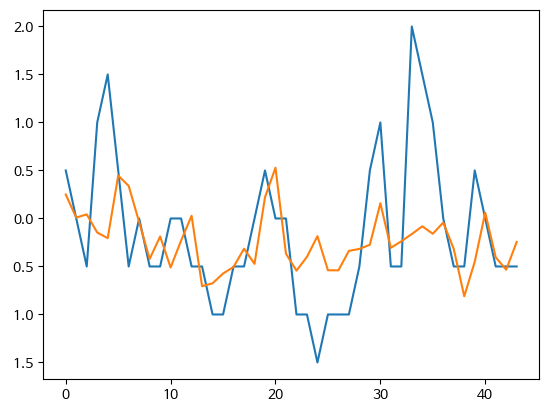

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2차원으로 바꾸기
def flatten_3d(X):
    return X.reshape(X.shape[0], -1)

X_tr = flatten_3d(X_train_win_mswsi)
X_te = flatten_3d(X_test_win_mswsi)

y_tr = np.asarray(y_train_win_mswsi, dtype=float)
y_te = np.asarray(y_test_win_mswsi,  dtype=float)

#  모델 학습
xgb = XGBRegressor(
    n_estimators=600,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='hist',
    eval_metric='rmse'
)
xgb.fit(X_tr, y_tr)

# 예측 & 평가
y_pred = xgb.predict(X_te)
mse  = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_te, y_pred)
r2   = r2_score(y_te, y_pred)
print(f"RMSE: {rmse:.4f} | MAE: {mae:.4f} | R^2: {r2:.4f}")


x = range(len(y_te))
plt.plot(x, y_te); plt.plot(x, y_pred); plt.show()


[SNAP] RMSE: 0.6990 | MAE: 0.5000 | R^2: 0.1462


/tmp/ipython-input-258774549.py:28: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.legend(); plt.tight_layout(); plt.show()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


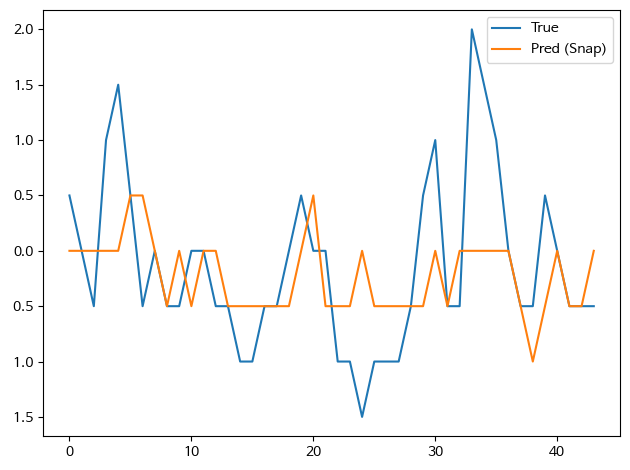

In [ ]:

#등급 집합(CLASSES)
CLASSES = np.array(sorted(np.unique(y_tr.astype(float))))  # 예: [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]

#  경계(midpoint) 기반 스냅 함수
def snap_by_midpoints(y_pred_cont, classes=CLASSES):
    y_pred_cont = np.asarray(y_pred_cont, dtype=float)
    classes = np.asarray(classes, dtype=float)
    boundaries = (classes[:-1] + classes[1:]) / 2.0     # 중간 경계
    bins = np.digitize(y_pred_cont, boundaries, right=False)  # 0..K-1
    return classes[bins]

#  스냅 적용
y_pred_cont = np.asarray(y_pred, dtype=float)          # 회귀 예측(연속)
y_pred_snap = snap_by_midpoints(y_pred_cont, CLASSES)  # 등급으로 스냅

#  평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

rmse = np.sqrt(mean_squared_error(y_te, y_pred_snap))
mae  = mean_absolute_error(y_te, y_pred_snap)
r2   = r2_score(y_te, y_pred_snap)
print(f"[SNAP] RMSE: {rmse:.4f} | MAE: {mae:.4f} | R^2: {r2:.4f}")


idx = range(len(y_te))
plt.plot(idx, y_te,        label='True')
plt.plot(idx, y_pred_snap, label='Pred (Snap)')
plt.legend(); plt.tight_layout(); plt.show()


RMSE: 0.7617 | MAE: 0.5798 | R^2: -1.6319


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


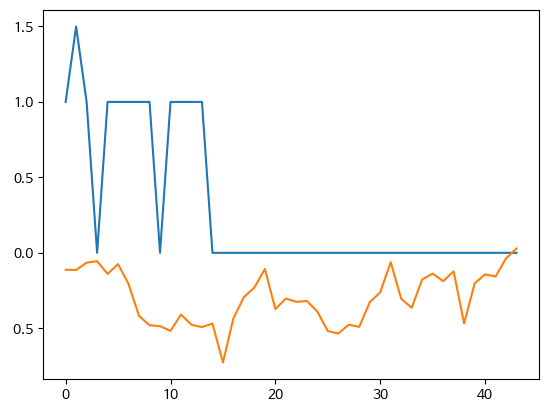

In [ ]:
# 2차원으로 바꾸기
def flatten_3d(X):
    return X.reshape(X.shape[0], -1)

X_tr_spi = flatten_3d(X_train_win_spi)
X_te_spi = flatten_3d(X_test_win_spi)

y_tr_spi = np.asarray(y_train_win_spi, dtype=float)
y_te_spi = np.asarray(y_test_win_spi,  dtype=float)

# 모델 학습
xgb_spi = XGBRegressor(
    n_estimators=600,
    max_depth=4,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='rmse'
)
xgb_spi.fit(X_tr_spi, y_tr_spi)

# 예측 & 평가
y_pred_spi = xgb_spi.predict(X_te_spi)
mse  = mean_squared_error(y_te_spi, y_pred_spi)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_te_spi, y_pred_spi)
r2   = r2_score(y_te_spi, y_pred_spi)
print(f"RMSE: {rmse:.4f} | MAE: {mae:.4f} | R^2: {r2:.4f}")


x = range(len(y_te_spi))
plt.plot(x, y_te_spi); plt.plot(x, y_pred_spi); plt.show()

[SNAP] RMSE: 0.7613 | MAE: 0.5682 | R^2: -1.6292


/tmp/ipython-input-993046892.py:25: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.legend(); plt.tight_layout(); plt.show()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


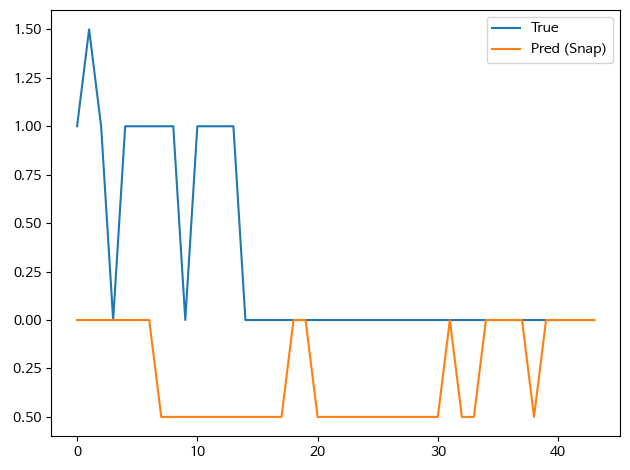

In [ ]:
#등급 집합(CLASSES)
CLASSES = np.array(sorted(np.unique(y_tr.astype(float))))  # 예: [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]

#  경계(midpoint) 기반 스냅 함수
def snap_by_midpoints(y_pred_cont, classes=CLASSES):
    y_pred_cont = np.asarray(y_pred_cont, dtype=float)
    classes = np.asarray(classes, dtype=float)
    boundaries = (classes[:-1] + classes[1:]) / 2.0     # 중간 경계 (shape: [K-1])
    bins = np.digitize(y_pred_cont, boundaries, right=False)  # 0..K-1
    return classes[bins]

#  스냅 적용
y_pred_cont = np.asarray(y_pred_spi, dtype=float)          # 회귀 예측(연속)
y_pred_snap = snap_by_midpoints(y_pred_cont, CLASSES)  # 등급으로 스냅

rmse = np.sqrt(mean_squared_error(y_te_spi, y_pred_snap))
mae  = mean_absolute_error(y_te_spi, y_pred_snap)
r2   = r2_score(y_te_spi, y_pred_snap)
print(f"[SNAP] RMSE: {rmse:.4f} | MAE: {mae:.4f} | R^2: {r2:.4f}")


idx = range(len(y_te_spi))
plt.plot(idx, y_te_spi,        label='True')
plt.plot(idx, y_pred_snap, label='Pred (Snap)')
plt.legend(); plt.tight_layout(); plt.show()
